### It is a competition offered by Kaggle site wherein this competition you are asked to predict the forest cover type (the predominant kind of tree cover) from strictly cartographic variables (as opposed to remotely sensed data)

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
%matplotlib inline

### Reading Datasets

In [6]:
train= pd.read_csv('train.csv')
test= pd.read_csv('test.csv')

In [7]:
full_data=[train,test]

In [8]:
train_copy=train.copy()
test_copy=test.copy()

In [9]:
train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


## EDA and Feature Engineering

In [10]:
del train['Id']

In [11]:
subm=test['Id']
del test["Id"]

/home/harshitssj4/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


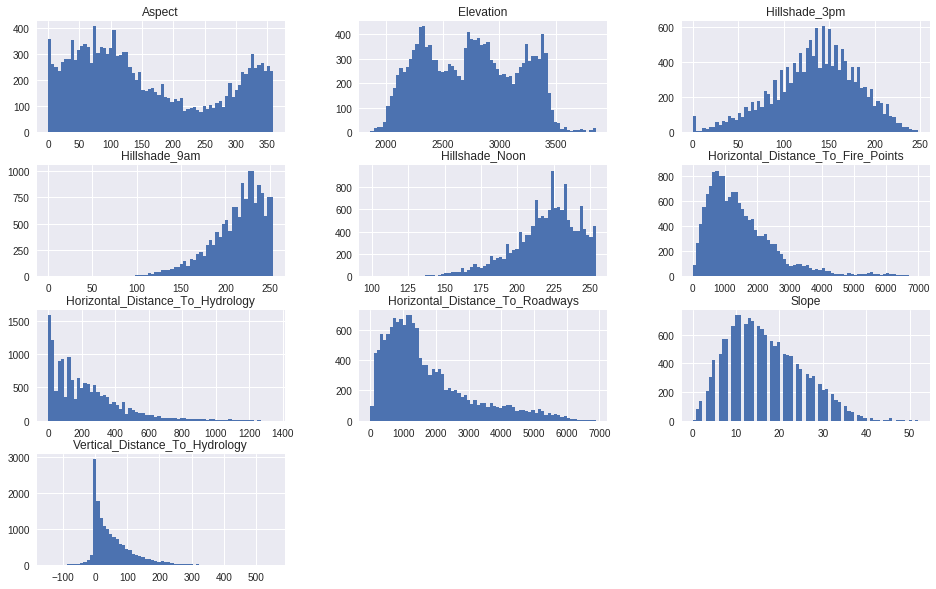

In [12]:
train.ix[:,:10].hist(bins=70,figsize=(16,10))
plt.show()

In [13]:
def angle(x):
    if x>180:
        return 180-x
    else:
        return x

In [14]:
train.columns

Index([u'Elevation', u'Aspect', u'Slope', u'Horizontal_Distance_To_Hydrology',
       u'Vertical_Distance_To_Hydrology', u'Horizontal_Distance_To_Roadways',
       u'Hillshade_9am', u'Hillshade_Noon', u'Hillshade_3pm',
       u'Horizontal_Distance_To_Fire_Points', u'Wilderness_Area1',
       u'Wilderness_Area2', u'Wilderness_Area3', u'Wilderness_Area4',
       u'Soil_Type1', u'Soil_Type2', u'Soil_Type3', u'Soil_Type4',
       u'Soil_Type5', u'Soil_Type6', u'Soil_Type7', u'Soil_Type8',
       u'Soil_Type9', u'Soil_Type10', u'Soil_Type11', u'Soil_Type12',
       u'Soil_Type13', u'Soil_Type14', u'Soil_Type15', u'Soil_Type16',
       u'Soil_Type17', u'Soil_Type18', u'Soil_Type19', u'Soil_Type20',
       u'Soil_Type21', u'Soil_Type22', u'Soil_Type23', u'Soil_Type24',
       u'Soil_Type25', u'Soil_Type26', u'Soil_Type27', u'Soil_Type28',
       u'Soil_Type29', u'Soil_Type30', u'Soil_Type31', u'Soil_Type32',
       u'Soil_Type33', u'Soil_Type34', u'Soil_Type35', u'Soil_Type36',
       u'Soil_

In [15]:
for data in full_data:
    data['Aspect']=data['Aspect'].apply(angle)

In [16]:
data.Aspect.describe()

count    565892.000000
mean          9.332420
std         101.663626
min        -180.000000
25%         -80.000000
50%          29.000000
75%          89.000000
max         180.000000
Name: Aspect, dtype: float64

Imputing missing values of Hillshade_3pm with GBRT

In [17]:
from sklearn.ensemble import GradientBoostingRegressor
impute=GradientBoostingRegressor(n_estimators=1000)

In [18]:
temp_train=train.copy()
cols=train.columns.tolist()
cols=cols[:8]+cols[9:]+[cols[8]]
temp_train=temp_train[cols]

In [19]:
temp_test=test.copy()
cols=test.columns.tolist()
cols=cols[:8]+cols[9:]+[cols[8]]
temp_test=temp_test[cols]

In [20]:
rxtrain,rytrain= temp_train[temp_train['Hillshade_3pm']!=0].ix[:,:54].values,temp_train[temp_train['Hillshade_3pm']!=0].ix[:,54].values

/home/harshitssj4/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


In [21]:
impute.fit(rxtrain,rytrain)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [22]:
values_train=impute.predict(temp_train[temp_train['Hillshade_3pm']==0].ix[:,:54].values)

/home/harshitssj4/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


In [23]:
values_test=impute.predict(temp_test[temp_test['Hillshade_3pm']==0].ix[:,:54].values)

/home/harshitssj4/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


In [24]:
train.loc[train['Hillshade_3pm']==0,'Hillshade_3pm']=values_train

In [25]:
test.loc[test['Hillshade_3pm']==0,'Hillshade_3pm']=values_test

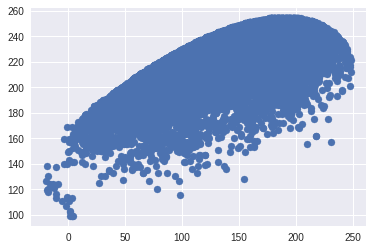

In [27]:
plt.scatter(train.Hillshade_3pm,train.Hillshade_Noon)

Creating new features

In [28]:
for data in full_data:
    data['dist_to_hydrology']=np.sqrt(data['Vertical_Distance_To_Hydrology']**2 + \
                                      data['Horizontal_Distance_To_Hydrology']**2)

In [29]:
for data in full_data:
    data['Highwater']=(data['Vertical_Distance_To_Hydrology']<0)*1

In [30]:
for data in full_data:
    data['Slope_to_hydrology']=data['Vertical_Distance_To_Hydrology']/ data['Horizontal_Distance_To_Hydrology']

In [31]:
for data in full_data:
    data.loc[data['Horizontal_Distance_To_Hydrology']==0,'Slope_to_hydrology']=0

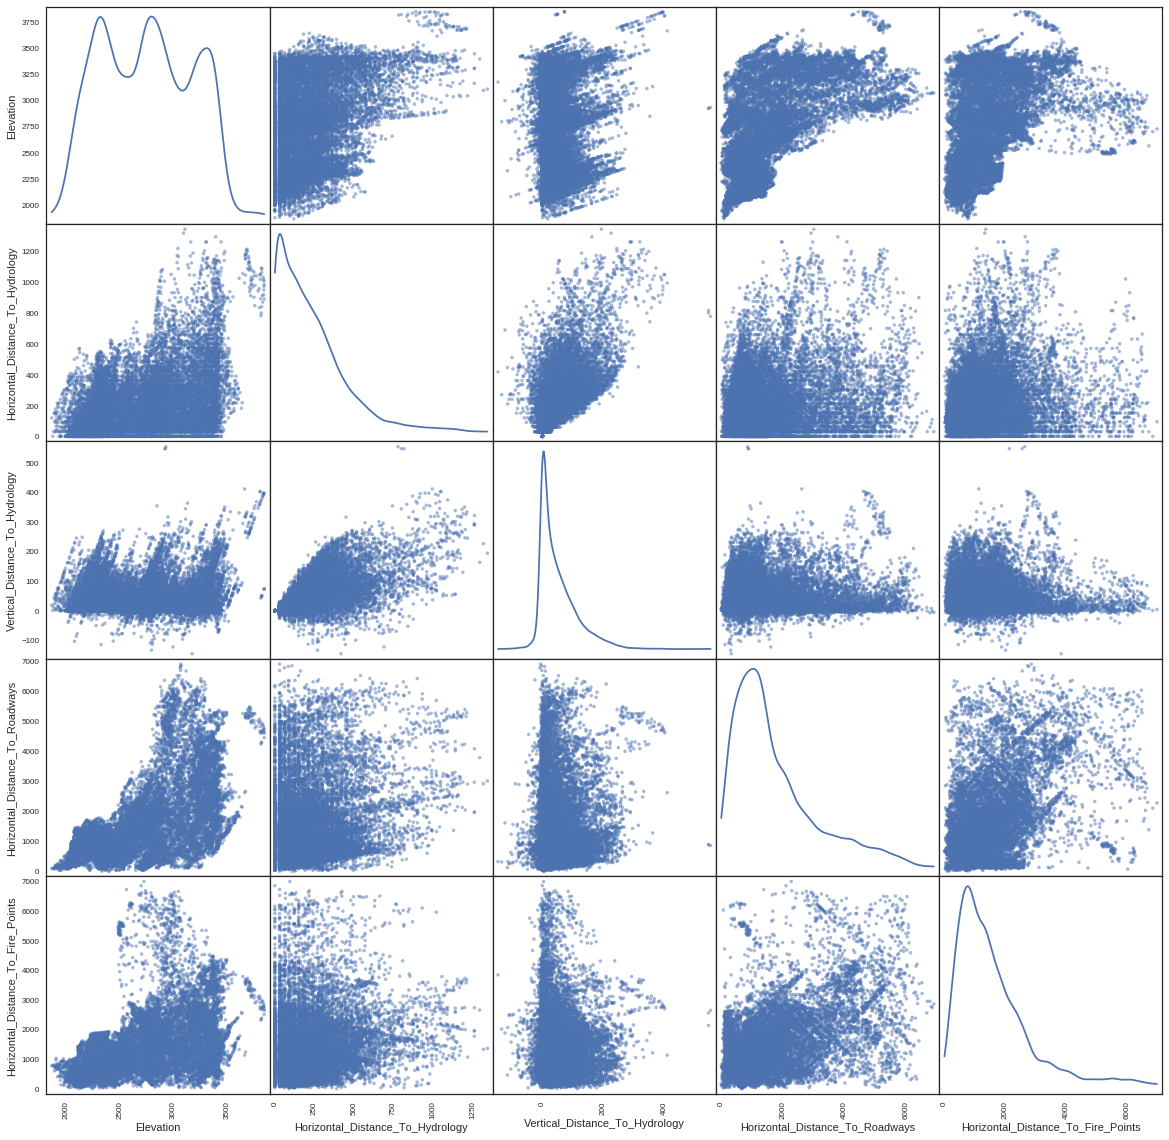

In [32]:
with sns.axes_style('white'):
    matrix=train[['Elevation','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology',\
                  'Horizontal_Distance_To_Roadways','Horizontal_Distance_To_Fire_Points']]
    scatter_matrix(matrix,figsize=(20,20),diagonal='kde')
plt.show()    

Creating more new features

In [33]:
for data in full_data:
    data['Ele_to_HD']=data.Elevation-0.2*data.Horizontal_Distance_To_Hydrology
    data['Elev_to_VD']=data.Elevation-data.Vertical_Distance_To_Hydrology
    data['Elev_to_HDR']=data.Elevation-0.05*data.Horizontal_Distance_To_Roadways

In [34]:
for data in full_data:
    data['amenities']=(data.Horizontal_Distance_To_Hydrology+data.Horizontal_Distance_To_Roadways \
                       +data.Horizontal_Distance_To_Fire_Points)/3

In [35]:
print train.shape
print test.shape

(15120, 62)
(565892, 61)


## Modelling

In [36]:
features=[x for x in train.columns if x not in ['Cover_Type']]

In [37]:
target=['Cover_Type']

In [38]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(train[features].values,train[target].values,test_size=0.15)
print xtest.shape
print ytest.shape

(2268, 61)
(2268, 1)


In [39]:
from sklearn.ensemble import RandomForestClassifier
clf_1=RandomForestClassifier(n_estimators=1000,random_state=2)

In [40]:
clf_1.fit(xtrain,ytrain)

/home/harshitssj4/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False, random_state=2,
            verbose=0, warm_start=False)

In [41]:
from sklearn.metrics import accuracy_score
print accuracy_score(ytrain,clf_1.predict(xtrain))
print accuracy_score(ytest,clf_1.predict(xtest))

1.0
0.89417989418


In [42]:
importances=clf_1.feature_importances_
importances.astype(float)
indices=np.argsort(importances)[::-1]

In [51]:
features1=np.array(features)

In [52]:
(pd.Series(importances[indices],index=(features1[indices])))

Ele_to_HD                             0.114738
Elev_to_VD                            0.110213
Elevation                             0.103497
Elev_to_HDR                           0.091074
amenities                             0.053977
Horizontal_Distance_To_Roadways       0.051932
Horizontal_Distance_To_Fire_Points    0.043722
dist_to_hydrology                     0.036466
Aspect                                0.035339
Hillshade_9am                         0.034726
Horizontal_Distance_To_Hydrology      0.032137
Hillshade_Noon                        0.031186
Vertical_Distance_To_Hydrology        0.029442
Hillshade_3pm                         0.029277
Slope_to_hydrology                    0.028868
Slope                                 0.021749
Wilderness_Area4                      0.020081
Soil_Type10                           0.016117
Wilderness_Area1                      0.012473
Wilderness_Area3                      0.011571
Soil_Type3                            0.011464
Soil_Type38  

In [44]:
clf_1.fit(train[features].values,np.ravel(train[target].values))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False, random_state=2,
            verbose=0, warm_start=False)

In [ ]:
predict=clf_1.predict(test[features].values)

In [ ]:
subm=pd.DataFrame(test['Id'])
subm['Cover_Type']=predict
subm.to_csv('Submission.csv',sep=',')



### This submission scored 0.74273 on Kaggle LeaderBoard